## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')

print(df.head())

   user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# Number of rows 294478
dataset_rows = df.shape[0]
print(dataset_rows)

294478


c. The number of unique users in the dataset.

In [4]:
# Number of unique user ids: 290584
unique_users_count = df['user_id'].nunique()
print(unique_users_count)

290584


d. The proportion of users converted.

In [5]:
# Number of converted users: 35237
converted_users_count = df[df['converted'] == 1].user_id.count()
print(converted_users_count)

# Proportion of users converted: 12%
(converted_users_count / unique_users_count) * 100

35237


12.126269856564711

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# For the rows where treatment is not aligned with new_page = 1965
treatment_not_new_page = df.query('group == "treatment" & landing_page != "new_page"')
print(treatment_not_new_page.user_id.count())

# Or control is not aligned with old_page = 1928
control_not_old_page = df.query('group == "control" & landing_page != "old_page"')
print(control_not_old_page.user_id.count())

# 1965 + 1928 = 3893
do_not_line_up = pd.merge(treatment_not_new_page, control_not_old_page, on='user_id', how='outer')
print(do_not_line_up.user_id.count())

1965
1928
3893


f. Do any of the rows have missing values?

In [7]:
# No values are missing
df[df.isnull()].count()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# We should remove the 3893 rows.
df2 = df.copy()
df2 = df2[((df.group == 'control') & (df.landing_page == 'old_page')) | 
          ((df.group == 'treatment') & (df.landing_page == 'new_page'))]

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
# Number of unique user ids: 290584
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# user_id 773192 is duplicated
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
# Duplicated row information
# user_id: 773192
# group: treatment
# landing_page: new_page
# converted: 0
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# Drop duplicate
df2.drop_duplicates(subset=['user_id'], inplace=True)

# Confirm no more duplicates
print(df2[df2.duplicated(['user_id'])])

Empty DataFrame
Columns: [user_id, timestamp, group, landing_page, converted]
Index: []


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
# Probability == 0.1196
converted_group = df2.query('converted == 1')
print(converted_group.user_id.nunique() / df2.user_id.nunique())

0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
# Probability == 0.1204
control_group = df2.query('group == "control"')
converted_control_group = converted_group.query('group == "control"')
print(converted_control_group.user_id.nunique() / control_group.user_id.nunique())

0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
# Probability == 0.1188
treatment_group = df2.query('group == "treatment"')
converted_treatment_group = converted_group.query('group == "treatment"')
print(converted_treatment_group.user_id.nunique() / treatment_group.user_id.nunique())

0.11880806551510564


d. What is the probability that an individual received the new page?

In [17]:
# Probability == 0.5001
new_page_group = df2.query('landing_page == "new_page"')
print(treatment_group.user_id.nunique() / df2.user_id.nunique())
print(new_page_group.user_id.nunique() / df2.user_id.nunique())

0.5000619442226688
0.5000619442226688


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

***Based only on the results above, the likelihood of conversion for both the control and treatment group are around 12%.  This suggested there is not a significant difference between the old page and the new page. We failed to reject the null hypothesis ***

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

-----------
Null Hypotheses: The old page has a better or equal conversion rate, when compared to the new page.  Mathematically, we would expect **$p_{new}$** - **$p_{old}$** <= 0

-----------
Alternative Hypotheses: The new page has a higher conversion rate, compared to the old page. Mathematically, we would expect **$p_{new}$** - **$p_{old}$** > 0 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
# p_new = 0.1196
p_new = df2.converted.mean()
print(p_new)

0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
# p_old = 0.1196
p_old = df2.converted.mean()
print(p_old)

0.11959708724499628


c. What is $n_{new}$?

In [20]:
# n new: 145310 
treatment_group = df2.query('group == "treatment"')
print(treatment_group.shape[0])

145310


d. What is $n_{old}$?

In [21]:
# n old: 145274
control_group = df2.query('group == "control"')
print(control_group.shape[0])

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted = np.random.choice([0,1], size=treatment_group.shape[0], p=[1-p_new, p_new])
print(new_page_converted.mean())

0.11875301080448696


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.choice([0,1], size=control_group.shape[0], p=[1-p_old, p_old])
print(old_page_converted.mean())

0.11991822349491306


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
new_page_converted.mean() - old_page_converted.mean()

-0.001165212690426104

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [25]:
diffs = []
for i in range(10000):
    new_page_converted = np.random.choice([0,1], size=treatment_group.shape[0], p=[1-p_new, p_new])
    old_page_converted = np.random.choice([0,1], size=control_group.shape[0], p=[1-p_old, p_old])
    diffs.append(new_page_converted.mean() - old_page_converted.mean())
    
p_diffs = np.array(diffs) 
print(p_diffs)

[ 9.47731823e-04 -8.14136588e-04  9.40325013e-05 ... -3.66849466e-04
  5.96630139e-04  7.76003051e-04]


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

-0.0015782389853555567


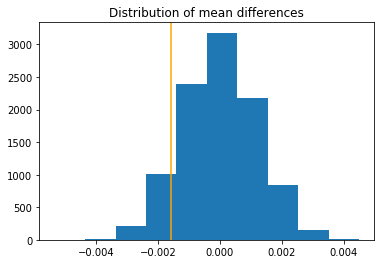

In [26]:
difference = treatment_group.converted.mean() - control_group.converted.mean()
plt.hist(p_diffs);
plt.axvline(x=difference, color='orange');
plt.title('Distribution of mean differences');

print(difference)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
print((p_diffs > difference).mean())

0.9047


k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**We are looking for a p-value below 0.05 to identify that the new page is statically higher than the old page, while also accounting for error. Our final value is around 0.9 which is higher than 0.05.  This is also visible by our histogram:  the read line shows it does not fall outside of the normal distribution.  We have failed to reject the null hypothesis so the new page is not significantly better than the old page. **

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm

convert_old = control_group.query('converted == 1').shape[0]
print(convert_old)

convert_new = treatment_group.query('converted == 1').shape[0]
print(convert_new)

n_old = control_group.shape[0]
print(n_old)

n_new = treatment_group.shape[0]
print(n_new)

17489
17264
145274
145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [30]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])
print(z_score)
print(p_value)

1.3109241984234394
0.18988337448195103


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

** We are looking for a z-score past -1.96 or higher than 1.96 to be significant.  Our z_score is between those numbers.  Also, our  p_value is higher than 0.05 suggesting it is not significant.  We have failed to reject the null hypothesis.  The new page does not produce a significantly higher conversion rate, compared to the old page. These results agree with all previous calculations. **

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**We are looking for a categorical response so we would want to use logistic regression. **

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
# Add treatment and ab_page values
df2['intercept'] = 1
df2[['treatment', 'ab_page']] = pd.get_dummies(df2['group'])
print(df2.info())

# treatment is not needed so remove it
df2.drop(['treatment'], axis=1, inplace=True)
df2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 8 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
intercept       290584 non-null int64
treatment       290584 non-null uint8
ab_page         290584 non-null uint8
dtypes: int64(3), object(3), uint8(2)
memory usage: 16.1+ MB
None


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [32]:
# Issues with scripy and statsmodels 
# https://github.com/statsmodels/statsmodels/issues/3931
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

results  = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']]).fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 26 May 2018   Pseudo R-squ.:               8.077e-06
Time:                        09:22:25   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**p-value from Part III: 0.190**

**p-value from Part II, (p_diffs > difference).mean(): 0.9**

**The p-value for (p_diffs > difference).mean() is calculating the mean differences between two groups.  Calculating mean difference is not the same as calculating the (regression) relationship between two variables. Both calculations fail to reject the null hypotheses.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**There are numerous factors that could influence conversion rate, beyond just the landing page.  Some of those factors include: customer age, customer gender, time of day the page was visited, the type of device the customer used to visit the page (phone/computer), etc. **

**The advantage of adding these variable is it will enhance our understand of the external factors and conversion rates.  For example, we would be able to identify whether or not age influences the conversion rate of a customer. **

**The disadvantage of including these multiple factors means we could incorrectly conclude there is a causation between factors when there is only a correlation. **

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [34]:
# Merge df2 with countries csv
with_countries = pd.read_csv('countries.csv').join(df2.set_index('user_id'), on='user_id')
print(with_countries.info())
with_countries.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 8 columns):
user_id         290584 non-null int64
country         290584 non-null object
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
intercept       290584 non-null int64
ab_page         290584 non-null uint8
dtypes: int64(3), object(4), uint8(1)
memory usage: 15.8+ MB
None


,user_id,country,timestamp,group,landing_page,converted,intercept,ab_page
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [35]:
# Add values for CA, UK, and US
print(with_countries['country'].unique())
with_countries[['CA','UK','US']] = pd.get_dummies(with_countries['country'])
with_countries.head()

['UK' 'US' 'CA']


,user_id,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [36]:
# Review country conversion rates
ca_converted = sm.Logit(with_countries['converted'], with_countries[['intercept', 'CA']]).fit()
print(ca_converted.summary())

uk_converted = sm.Logit(with_countries['converted'], with_countries[['intercept', 'UK']]).fit()
print(uk_converted.summary())

us_converted = sm.Logit(with_countries['converted'], with_countries[['intercept', 'US']]).fit()
print(us_converted.summary())

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 26 May 2018   Pseudo R-squ.:               1.259e-05
Time:                        09:22:36   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1016
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9941      0.006   -340.272      0.000      -2.006      -1.983
CA            -0.0434      0.

In [38]:
# Explain country conversion rate results

# US conversion rates
print('Convertion is ' + str(round(np.exp(us_converted.params['US']), 3)) + ' times as likely when comparing US users to non-US users, holding all else constant')

# UK converstion rates
print('Convertion is ' + str(round(np.exp(uk_converted.params['UK']), 3)) + ' times as likely when comparing UK users to non-UK users, holding all else constant')

# CA converstion rates
print('Convertion is ' + str(round(np.exp(ca_converted.params['CA']), 3)) + ' times as likely when comparing CA users to non-CA users, holding all else constant')

print('Given the p-values of 0.898, 0.340, and 0.103 it does not appear any country is converting siginificantly. \
There does not appear to be any impact on conversion, when reviewing countries.')


Convertion is 0.998 times as likely when comparing US users to non-US users, holding all else constant
Convertion is 1.013 times as likely when comparing UK users to non-UK users, holding all else constant
Convertion is 0.958 times as likely when comparing CA users to non-CA users, holding all else constant
Given the p-values of 0.898, 0.340, and 0.103 it does not appear any country is converting siginificantly. There does not appear to be any impact on conversion, when reviewing countries.


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [40]:
# Review country conversion rates with new page
ca_new_page = sm.Logit(with_countries['converted'], with_countries[['intercept', 'ab_page', 'CA']]).fit()
print(ca_new_page.summary())

uk_new_page = sm.Logit(with_countries['converted'], with_countries[['intercept', 'ab_page', 'UK']]).fit()
print(uk_new_page.summary())

us_new_page = sm.Logit(with_countries['converted'], with_countries[['intercept', 'ab_page', 'US']]).fit()
print(us_new_page.summary())


Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 26 May 2018   Pseudo R-squ.:               2.064e-05
Time:                        09:26:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1113
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9867      0.008   -243.359      0.000      -2.003      -1.971
ab_page       -0.0150      0.

The p-values for ab_page and countries are all above 0.05, suggesting that there is no significant relationship.  We have failed to reject the null hypotheses.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])